##### Python guided project on Gapminder dataset
##### Gapminder dataset explains about GDP per capita as a measure of average income per person in a country. This dataset contains
##### information about population, life expectancy, and gdp percapita from 1952 till 2007 for each country. In this project we are going use python  to address certain questions.
##### Variables used in this dataset are:
##### 1: country = Country 
##### 2: year = Data collected year
##### 3: population = Population of each country
##### 4: continent = Continent where country is located
##### 5: life_exp = Life expectancy at birth
##### 6: gdp_cap = GDP per capita


##### Understanding of dataset
Before moving to any dataset, we must have to understand each variable properly. For example, in this dataset nearly all columns are self-explanatory, but gdp_cap may be confusing. In this project, we have two different datasets containing information about Gapminder. Both datasets have common keys.  
GDP stands for Gross Domestic Product. This measure National income / National Output and National expenditure.
GDP per capita divides the GDP by the population.
Rest of the columns are self-explanatory.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Gapminder_dataset_1 = pd.read_excel(r"C:\Users\AMULYA\OneDrive\Desktop\Gapminder_key_1.xlsx")
Gapminder_dataset_2 = pd.read_excel(r"C:\Users\AMULYA\OneDrive\Desktop\Gapminder_key_2.xlsx")

In [3]:
Gapminder_dataset = Gapminder_dataset_1.merge(Gapminder_dataset_2,on = ['country','year'],how= 'outer')
Gapminder_dataset

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [4]:
Gapminder_dataset.shape

(1704, 6)

In [5]:
Gapminder_dataset.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [6]:
Gapminder_dataset.describe(include=['object'])


,country,continent
count,1704,1704
unique,142,5
top,Afghanistan,Africa
freq,12,624


In [7]:
Gapminder_dataset.describe(include='all')

,country,year,population,continent,life_exp,gdp_cap
count,1704,1704.00000,1.704000e+03,1704,1704.000000,1704.000000
unique,142,NaN,NaN,5,NaN,NaN
top,Afghanistan,NaN,NaN,Africa,NaN,NaN
freq,12,NaN,NaN,624,NaN,NaN
mean,NaN,1979.50000,2.960121e+07,NaN,59.474439,7215.327081
std,NaN,17.26533,1.061579e+08,NaN,12.917107,9857.454543
min,NaN,1952.00000,6.001100e+04,NaN,23.599000,241.165876
25%,NaN,1965.75000,2.793664e+06,NaN,48.198000,1202.060309
50%,NaN,1979.50000,7.023596e+06,NaN,60.712500,3531.846988
75%,NaN,1993.25000,1.958522e+07,NaN,70.845500,9325.462346


In [8]:
Gapminder_dataset.mean()

C:\Users\AMULYA\AppData\Local\Temp/ipykernel_16788/2772475566.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Gapminder_dataset.mean()


year          1.979500e+03
population    2.960121e+07
life_exp      5.947444e+01
gdp_cap       7.215327e+03
dtype: float64

#### Q1: Country and continent are string data type. Please convert them into categorical data type using porgramming constructs.

In [9]:
for col in ['country', 'continent']:
    Gapminder_dataset[col] = Gapminder_dataset[col].astype('category')
Gapminder_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


#### Q2: Count the number of countries in this dataset.

In [10]:
Gapminder_dataset['country'].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [11]:
countries = Gapminder_dataset['country'].unique()

len(countries)

142

In [12]:
Gapminder_dataset.isna().any()

country       False
year          False
population    False
continent     False
life_exp      False
gdp_cap       False
dtype: bool

#### Q3: Which country had the lowest life expectancy in 2007?

In [13]:
Gapminder_2007 = Gapminder_dataset[Gapminder_dataset['year']== 2007]
Gapminder_2007[Gapminder_2007.life_exp == Gapminder_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


#### Q4: Which country had the highest GDP per capita in 2007?

In [14]:
Gapminder_2007 = Gapminder_dataset[Gapminder_dataset['year']== 2007]
Gapminder_2007[Gapminder_2007.gdp_cap == Gapminder_2007.gdp_cap.max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


#### Q5: Which country had the highest GDP in 2007?

#### use formula

In [15]:
Gapminder_dataset['gdp'] = Gapminder_dataset.gdp_cap*Gapminder_dataset.population
Gapminder_2007 = Gapminder_dataset[Gapminder_dataset['year']==2007]
Gapminder_2007[Gapminder_2007.gdp==Gapminder_2007.gdp.max()]

,country,year,population,continent,life_exp,gdp_cap,gdp
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


#### Q6. Is there any change in the trend from 1952 to 2007 in life expectancy

<AxesSubplot:xlabel='year', ylabel='life_exp'>

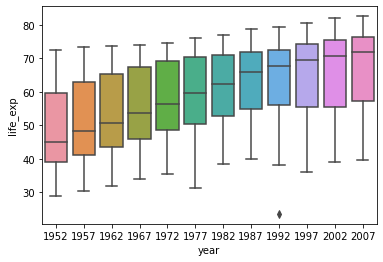

In [16]:
sns.boxplot(x ='year', y = 'life_exp', data = Gapminder_dataset)

#### Q7: Which continent has the lowest life expectancy in 2007?

<AxesSubplot:xlabel='continent', ylabel='life_exp'>

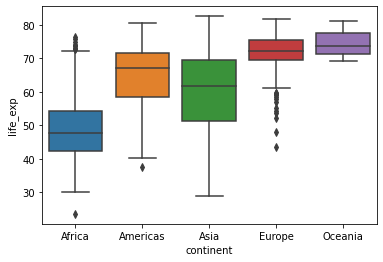

In [17]:
sns.boxplot(x ='continent', y = 'life_exp', data = Gapminder_dataset)

#### Q8: What was the average life expectancy, GDP and gdp per capita in 2007?

Text(0, 0.5, 'Life Expectancy[in years]')

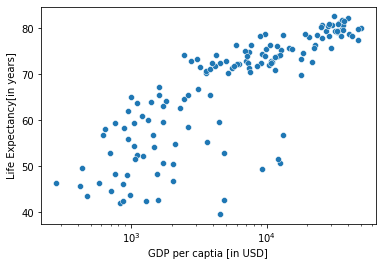

In [18]:
sns.scatterplot(x = 'gdp_cap',
               y ='life_exp',
               data = Gapminder_2007)
plt.xscale('log')#converting x scale into log
plt.xlabel('GDP per captia [in USD]')
plt.ylabel('Life Expectancy[in years]')

#### Q9: Is there any relationship between life expectancy and gdp per capita? Please show each data point by continent.

Text(0, 0.5, 'Life Expectancy[in years]')

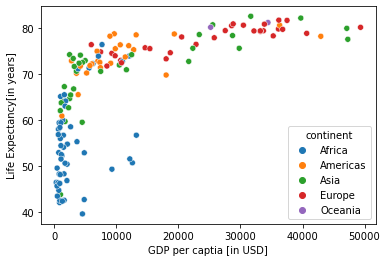

In [23]:
sns.scatterplot(x = 'gdp_cap',
                y ='life_exp',
                hue = 'continent', 
                data = Gapminder_2007)
plt.xlabel('GDP per captia [in USD]')
plt.ylabel('Life Expectancy[in years]')

#### Q10: What can be done to see the relationship better between life expectancy and gdp percapita?

In [25]:
Gapminder_India = Gapminder_dataset[Gapminder_dataset['country']== 'India'] 

<AxesSubplot:xlabel='life_exp', ylabel='gdp_cap'>

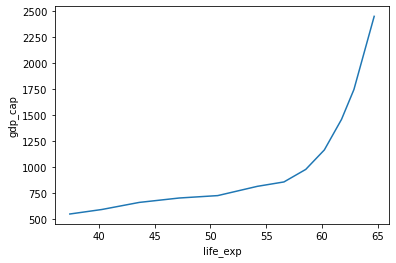

In [30]:
sns.lineplot(x = 'life_exp', y = 'gdp_cap', data = Gapminder_India)

#### 11. What is the trend of life expectancy in India from 1952 - 2007?

<AxesSubplot:xlabel='year', ylabel='life_exp'>

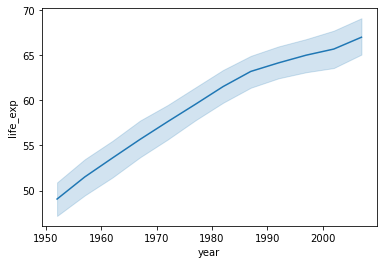

In [27]:
sns.lineplot(data = Gapminder_dataset, x = 'year', y = 'life_exp')

#### Q12: What is the trend of GDP per capita in India from 1952 - 2007?

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

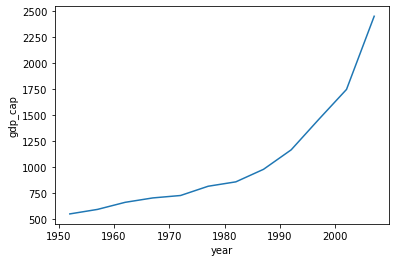

In [32]:
sns.lineplot(x = 'year', y = 'gdp_cap', data = Gapminder_India)

#### Q13: What is the median age of each continent by year?

In [21]:
Gapminder_gb_year_cont = Gapminder_dataset.groupby(['year', 'continent'])['life_exp'].median()
Gapminder_gb_year_cont

year  continent
1952  Africa       38.8330
      Americas     54.7450
      Asia         44.8690
      Europe       65.9000
      Oceania      69.2550
1957  Africa       40.5925
      Americas     56.0740
      Asia         48.2840
      Europe       67.6500
      Oceania      70.2950
1962  Africa       42.6305
      Americas     58.2990
      Asia         49.3250
      Europe       69.5250
      Oceania      71.0850
1967  Africa       44.6985
      Americas     60.5230
      Asia         53.6550
      Europe       70.6100
      Oceania      71.3100
1972  Africa       47.0315
      Americas     63.4410
      Asia         56.9500
      Europe       70.8850
      Oceania      71.9100
1977  Africa       49.2725
      Americas     66.3530
      Asia         60.7650
      Europe       72.3350
      Oceania      72.8550
1982  Africa       50.7560
      Americas     67.4050
      Asia         63.7390
      Europe       73.4900
      Oceania      74.2900
1987  Africa       51.6395
      Americ